# Multiclass classification example

In [62]:
from pnet import pnet_loader, Pnet
from util import util, sankey_diag

import torch
import seaborn as sns
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import scipy

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We use cancer type prediction as a multiclass example. To keep it simple we use three different cancer types only from the TCGA pancan cohort: LUSC, LUAD and BRCA.

In [2]:
paths = ['lusc_tcga_pan_can_atlas_2018', 'luad_tcga_pan_can_atlas_2018', 'brca_tcga_pan_can_atlas_2018']
paths = ['/mnt/disks/pancan/data/'+ p for p in paths]

In [4]:
# For All data sets
rna, cna, tumor, mut = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for path in paths:
    rna_, cna_, tumor_, mut_ = util.load_tcga_dataset(path, load_mut=True, rna_standardized=False)
    rna = pd.concat([rna_, rna])
    cna = pd.concat([cna_, cna])
    tumor = pd.concat([tumor_, tumor])
    mut = pd.concat([mut_, mut])
    
rna.dropna(axis=1, inplace=True)
cna.dropna(axis=1, inplace=True)
mut.dropna(axis=1, inplace=True)
rna = (rna-rna.mean())/rna.std()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


To predict the cancer type we restrict the model to only use copy number abberations and mutations from a predefined list of cancer genes.

In [5]:
genetic_data = {'cna': cna, 'mut': mut}

In [10]:
canc_genes = list(pd.read_csv('../../pnet_database/genes/cancer_genes.txt').values.reshape(-1))

To generate the target of prediction, we use the pandas get_dummies function to get a one-hot encoded dataframe of the tumor types. Additionally, here we use the option to pass predefined data splits into the train and test loader generator.

Task defined: MC 
 if this is not the intended task please specify task
Given 2 Input modalities
Found 1962 overlapping indicies
Initializing Train Dataset
Found 603 overlapping genes
generated input DataFrame of size (1113, 1206)
Initializing Test Dataset
Found 603 overlapping genes
generated input DataFrame of size (277, 1206)
Found 603 overlapping genes
Loss function used: CrossEntropyLoss()
We are sending to cuda
Hit early stopping criteria
Task defined: MC 
 if this is not the intended task please specify task
Given 2 Input modalities
Found 1962 overlapping indicies
Initializing Train Dataset
Found 603 overlapping genes
generated input DataFrame of size (1112, 1206)
Initializing Test Dataset
Found 603 overlapping genes
generated input DataFrame of size (278, 1206)
Found 603 overlapping genes
Loss function used: CrossEntropyLoss()
We are sending to cuda
Hit early stopping criteria
Task defined: MC 
 if this is not the intended task please specify task
Given 2 Input modalities
Found

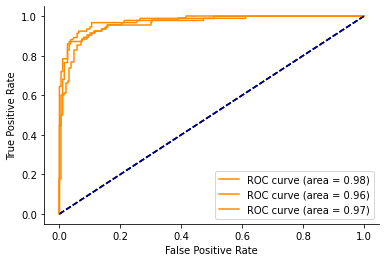

In [12]:
for i in range(5):
    train_inds = list(pd.read_csv('../data/splits/tumor_type/train_set_{}.csv'.format(i))['indicies'])
    test_inds = list(pd.read_csv('../data/splits/tumor_type/test_set_{}.csv'.format(i))['indicies'])
    model, train_scores, test_scores, train_dataset, test_dataset = Pnet.run(genetic_data, pd.get_dummies(tumor), seed=0, dropout=0.2, lr=1e-3, weight_decay=1e-3,
                                                                           batch_size=64, epochs=300, early_stopping=True, train_inds=train_inds,
                                                                           test_inds=test_inds, input_dropout=0.5, gene_set=canc_genes)
    plt.clf()
    Pnet.evaluate_interpret_save(model, test_dataset, '../results/tumor_type/run{}'.format(i))

To compare performance with the random sparse network we can just pass this as an argument to the run function

Task defined: MC 
 if this is not the intended task please specify task
Given 2 Input modalities
Found 1962 overlapping indicies
Initializing Train Dataset
Found 603 overlapping genes
generated input DataFrame of size (1113, 1206)
Initializing Test Dataset
Found 603 overlapping genes
generated input DataFrame of size (277, 1206)
Found 603 overlapping genes
Loss function used: CrossEntropyLoss()
We are sending to cuda
Hit early stopping criteria
Task defined: MC 
 if this is not the intended task please specify task
Given 2 Input modalities
Found 1962 overlapping indicies
Initializing Train Dataset
Found 603 overlapping genes
generated input DataFrame of size (1112, 1206)
Initializing Test Dataset
Found 603 overlapping genes
generated input DataFrame of size (278, 1206)
Found 603 overlapping genes
Loss function used: CrossEntropyLoss()
We are sending to cuda
Hit early stopping criteria
Task defined: MC 
 if this is not the intended task please specify task
Given 2 Input modalities
Found

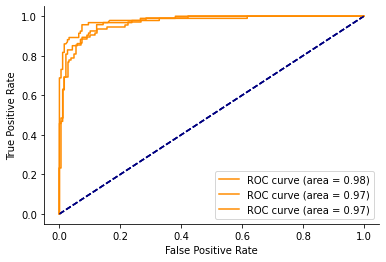

In [14]:
for i in range(5):
    train_inds = list(pd.read_csv('../data/splits/tumor_type/train_set_{}.csv'.format(i))['indicies'])
    test_inds = list(pd.read_csv('../data/splits/tumor_type/test_set_{}.csv'.format(i))['indicies'])
    model, train_scores, test_scores, train_dataset, test_dataset = Pnet.run(genetic_data, pd.get_dummies(tumor), seed=0, dropout=0.2, lr=1e-3, weight_decay=1e-3,
                                                                           batch_size=64, epochs=300, early_stopping=True, train_inds=train_inds,
                                                                           test_inds=test_inds, input_dropout=0.5, gene_set=canc_genes, random_network=True)
    plt.clf()
    Pnet.evaluate_interpret_save(model, test_dataset, '../results/tumor_type_random_net/run{}'.format(i))

Similarly for the fully connected neural network

Task defined: MC 
 if this is not the intended task please specify task
Given 2 Input modalities
Found 1962 overlapping indicies
Initializing Train Dataset
Found 603 overlapping genes
generated input DataFrame of size (1113, 1206)
Initializing Test Dataset
Found 603 overlapping genes
generated input DataFrame of size (277, 1206)
Found 603 overlapping genes
Loss function used: CrossEntropyLoss()
We are sending to cuda
Hit early stopping criteria
Task defined: MC 
 if this is not the intended task please specify task
Given 2 Input modalities
Found 1962 overlapping indicies
Initializing Train Dataset
Found 603 overlapping genes
generated input DataFrame of size (1112, 1206)
Initializing Test Dataset
Found 603 overlapping genes
generated input DataFrame of size (278, 1206)
Found 603 overlapping genes
Loss function used: CrossEntropyLoss()
We are sending to cuda
Hit early stopping criteria
Task defined: MC 
 if this is not the intended task please specify task
Given 2 Input modalities
Found

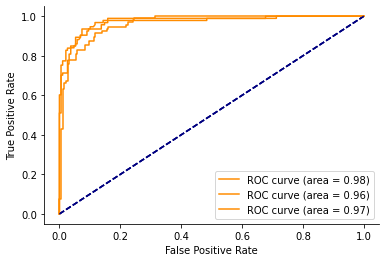

In [15]:
for i in range(5):
    train_inds = list(pd.read_csv('../data/splits/tumor_type/train_set_{}.csv'.format(i))['indicies'])
    test_inds = list(pd.read_csv('../data/splits/tumor_type/test_set_{}.csv'.format(i))['indicies'])
    model, train_scores, test_scores, train_dataset, test_dataset = Pnet.run(genetic_data, pd.get_dummies(tumor), seed=0, dropout=0.2, lr=1e-3, weight_decay=1e-3,
                                                                           batch_size=64, epochs=300, early_stopping=True, train_inds=train_inds,
                                                                           test_inds=test_inds, input_dropout=0.5, gene_set=canc_genes, fcnn=True)
    plt.clf()
    Pnet.evaluate_interpret_save(model, test_dataset, '../results/tumor_type_fcnn/run{}'.format(i))

Now we can compare the performance of Pnet to the performance of the random sparse connection model and the fully connected neural network:

In [56]:
models = {'Pnet': '', 'Sparse Net': '_random_net', 'Fully connected NN': '_fcnn'}
column_names = ['AUC_brca', 'AUC_luad', 'AUC_lusc', 'Model']
aucs = pd.DataFrame(columns=column_names)
k = 5
for i in range(k):
    for m in models:
        auc_ = torch.load('../results/tumor_type{}/run{}/AUC.pt'.format(models[m], i)) + [m]
        df = pd.DataFrame([auc_], columns=column_names)
        aucs = pd.concat([aucs, df])
aucs = aucs.reset_index(drop=True)

aucs.groupby('Model').mean()

,AUC_brca,AUC_luad,AUC_lusc
Model,,,
Fully connected NN,0.977684,0.966005,0.969870
Pnet,0.980540,0.966737,0.969264
Sparse Net,0.980518,0.966574,0.968978


We see the performance for Pnet is slightly higher than the other two models. But the strength of Pnet is not mainly the performance but the interpretability. Let's see if we can uncover biological that are potentially more or less abundant in brest cancer than in the lung cancer types.

In [67]:
all_imps = pd.DataFrame(columns=['SNR', 'Model', 'Layer', 'imp_mean', 'imp_std'])
models = {'Pnet': '', 'Sparse Net': '_random_net'}
for m in models:
    for l in ['gene_feature', 'gene', 'layer_0', 'layer_1', 'layer_2', 'layer_3']:
        df_imps = pd.DataFrame()
        df_ranks = pd.DataFrame()
        for i in range(5):
            imps = pd.read_csv('../results/tumor_type{}/run{}/{}_importances.csv'.format(models[m], i, l)).set_index('Unnamed: 0')
            imps = abs(imps.join(pd.get_dummies(tumor)[['tumor_brca']]).groupby('tumor_brca').mean().diff(axis=0).iloc[1])
            ranks = imps.rank(ascending=False)
            df_imps['run{}'.format(i)] = imps
            df_ranks['run{}'.format(i)] = ranks
            
        imp_mean = df_imps.mean(axis=1)
        imp_std = df_imps.std(axis=1)
        snr = imp_mean/(imp_std+1e-9)
        melted_imps = snr.to_frame('SNR')
        melted_imps['imp_mean'] = imp_mean
        melted_imps['imp_std'] = imp_std
        melted_imps['Model'] = m
        melted_imps['Layer'] = l
        all_imps = pd.concat([all_imps, melted_imps])

        
layer_numeric = {'gene_feature':-1, 'gene':0, 'layer_0':1, 'layer_1':2, 'layer_2':3, 'layer_3':4}
all_imps['Numeric Layer'] = all_imps['Layer'].apply(lambda x: layer_numeric[x])
all_imps['Z'] = all_imps.groupby('Layer')['SNR'].transform(lambda x: (x - x.mean()) / x.std())
all_imps['p_val'] = scipy.stats.norm.sf(abs(all_imps['Z']))

all_pathway_imps = all_imps[~all_imps['Layer'].isin(['gene_feature', 'gene'])]
all_imps[all_imps['Z'] > 5]

,SNR,Model,Layer,imp_mean,imp_std,Numeric Layer,Z,p_val
PMS2_cna,9.272581,Pnet,gene_feature,0.045712,0.004930,-1,11.180935,2.527719e-29
MSH2_cna,6.022969,Pnet,gene_feature,0.015985,0.002654,-1,6.638989,1.579205e-11
ETV1_cna,5.238398,Pnet,gene_feature,0.010734,0.002049,-1,5.542404,1.491738e-08
TP53_mut,5.895090,Pnet,gene_feature,0.074647,0.012663,-1,6.460254,5.226379e-11
HNF1A_mut,7.565647,Pnet,gene_feature,0.000106,0.000014,-1,8.795173,7.141400e-19
KRAS_mut,5.047514,Pnet,gene_feature,0.177173,0.035101,-1,5.275607,6.615854e-08
MUC16_mut,7.135855,Pnet,gene_feature,0.161729,0.022664,-1,8.194458,1.258627e-16
PIK3CA_mut,7.866322,Pnet,gene_feature,0.225035,0.028607,-1,9.215423,1.550272e-20
TP53,7.060947,Pnet,gene,0.068923,0.009761,0,6.953058,1.787261e-12
PMS2,8.724427,Pnet,gene,0.045760,0.005245,0,9.016157,9.740117e-20


On a gene level we observe the expected with PIK3CA, MUC16, KRAS and TP53 being very important, but this also shows up in the sparse architecture. Interestingly, we can see that FGFR3 fusions are more abundant in one of the cancer types (described in 10.3390/ijms21186856). Similalry e.g. VEGFA-VEGFR2 pathway being described for angiogenesis in lung cancer (10.1172/JCI65385).